### 4. [Nieobowiązkowe] Wykres średniej długości rozgrywki L od p
Proszę zasymulować N=100 procesów ruiny gracza z łącznymi kapitałami początkowymi a = b = 50.

Proszę wyznaczyć wykres średniego trwania rozgrywki (wartość znana z poprzedniego zadania) w zależności od prawdopodobieństwa p.

Dane z zadania 3:

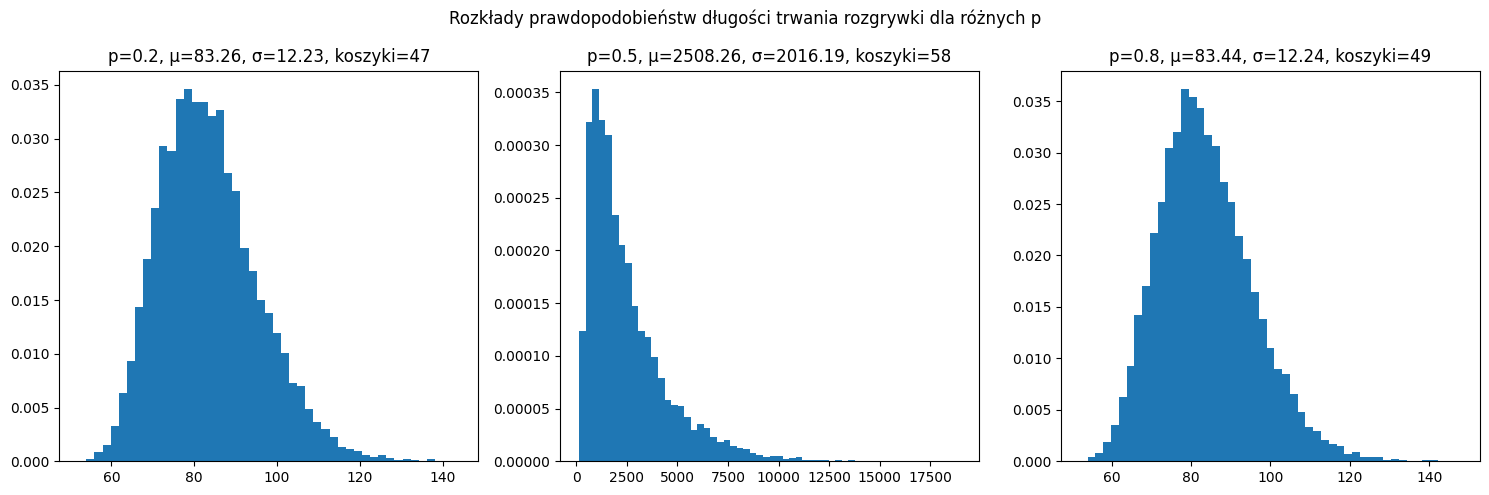

In [2]:
import matplotlib.pyplot as plt

In [3]:
mean_durations = {
    "0.2": 83,
    "0.5": 2508,
    "0.8": 83
}

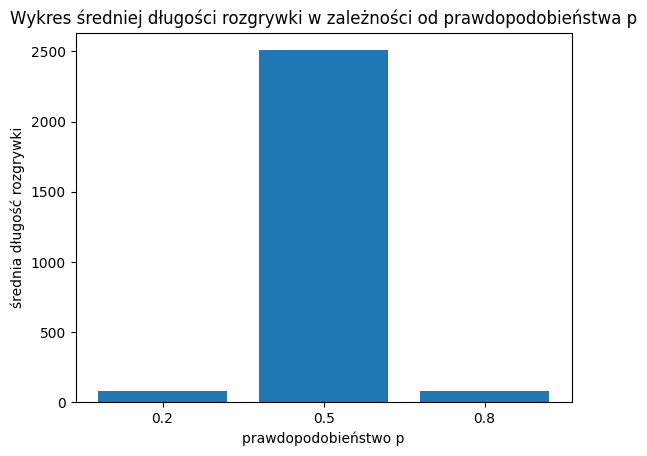

In [4]:
plt.title("Wykres średniej długości rozgrywki w zależności od prawdopodobieństwa p")
plt.xlabel("prawdopodobieństwo p")
plt.ylabel("średnia długość rozgrywki")
plt.bar(mean_durations.keys(), mean_durations.values());